# Machine Learning Visualization

## Creating Parallel Coordinates Plots in Python

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from sklearn_pandas import CategoricalImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogamesales/vgsales.csv


## Set up

In [2]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'column_name': df.columns,
                               'percent_missing': percent_missing})
missing_values

,column_name,percent_missing
Rank,Rank,0.000000
Name,Name,0.000000
Platform,Platform,0.000000
Year,Year,1.632727
Genre,Genre,0.000000
Publisher,Publisher,0.349440
NA_Sales,NA_Sales,0.000000
EU_Sales,EU_Sales,0.000000
JP_Sales,JP_Sales,0.000000
Other_Sales,Other_Sales,0.000000


In [4]:
labels = df['Genre']
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [5]:
imputer = CategoricalImputer()
df['Year'] = imputer.fit_transform(df['Year'].values)
df['Publisher'] = imputer.fit_transform(df['Publisher'].values)
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'column_name': df.columns,
                               'percent_missing': percent_missing})
missing_values

,column_name,percent_missing
Rank,Rank,0.0
Name,Name,0.0
Platform,Platform,0.0
Year,Year,0.0
Genre,Genre,0.0
Publisher,Publisher,0.0
NA_Sales,NA_Sales,0.0
EU_Sales,EU_Sales,0.0
JP_Sales,JP_Sales,0.0
Other_Sales,Other_Sales,0.0


In [6]:
df = df.drop(['Rank', 'Year'], axis=1)
df = df.apply(preprocessing.LabelEncoder().fit_transform)
enc_labels = df['Genre']
df = pd.get_dummies(df)
df.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,11007,26,10,359,408,304,220,155,622
1,9327,11,4,359,407,260,241,77,621
2,5573,26,6,359,404,303,221,152,620
3,11009,26,10,359,403,302,213,151,619
4,7346,5,7,359,397,296,243,96,618


In [7]:
labels.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [8]:
plt.rcParams['legend.fontsize'] = '16'

## Pandas

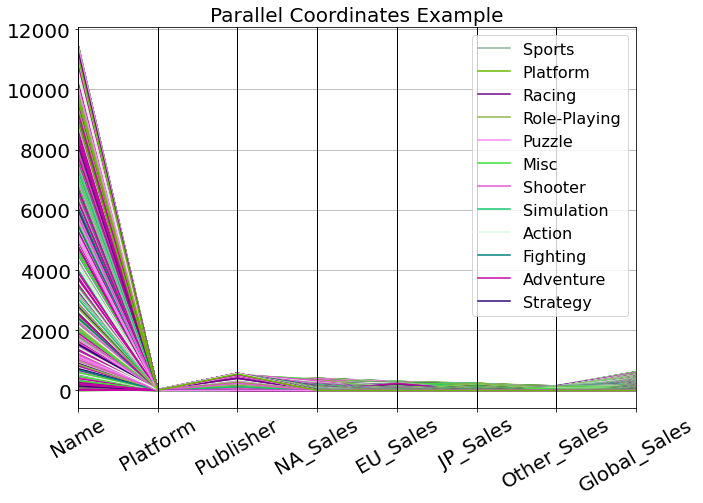

In [9]:
from pandas.plotting import parallel_coordinates

df2 = df.drop(['Genre'], axis=1)
df2['Genre'] = labels

#df.plot(figsize=(10,10), fontsize=24)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_title("Parallel Coordinates Example", fontsize=20)
ax.tick_params(axis='x', rotation=30)
ax.tick_params(axis='both', labelsize=20)
parallel_coordinates(df2, class_column='Genre', ax=ax)

In [10]:
X = df.drop(['Genre'], axis=1)
y = df['Genre']
scaler = StandardScaler().fit(X)
X2 = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

## Yellowbrick

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


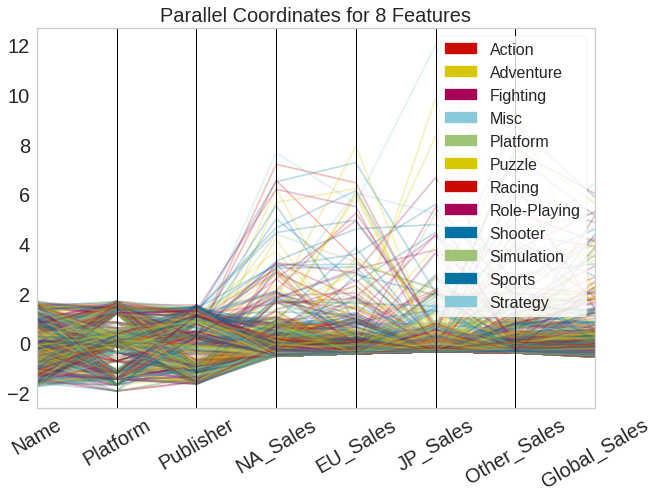

In [11]:
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
features = list(X.columns)
classes = list(labels.unique())

# Fit the visualizer and display it
plt.rcParams['legend.fontsize'] = '16'
plt.rcParams['axes.titlesize'] = '20'
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.tick_params(axis='x', rotation=30)
ax.tick_params(axis='both', labelsize=20)

# Instantiate the visualizer
visualizer = ParallelCoordinates(ax=ax,
    classes=classes, features=features,
    normalize='standard', sample=0.05, shuffle=True
)

visualizer.fit_transform(X, labels)
visualizer.show(fontsize=20)

In [12]:
clf = RandomForestClassifier(max_depth=5)
clf.fit(X_train, y_train)
predictionforest = clf.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[871  81   0  36   0   0   0  57   0   0  54   2]
 [175 171   0  18   0   0   0  50   0   0  13   2]
 [194  24   0   2   0   0   0  44   0   0  23   0]
 [321  66   0  53   0   0   0  66   0   0  63   1]
 [235   8   0   7   1   0   0  24   0   0  13   1]
 [117   7   0  23   0   0   0  27   0   0  11   0]
 [324   8   0   7   0   0   0  12   0   0  62   2]
 [228  68   0   5   0   0   0 163   0   0  19   1]
 [354  15   0   5   0   0   0  14   7   0  26   4]
 [149  30   0  38   0   0   0  30   0   0  24   7]
 [409  26   0  19   0   0   0  37   0   0 300   2]
 [136  22   0   2   0   0   0  46   0   0  10   6]]
              precision    recall  f1-score   support

           0       0.25      0.79      0.38      1101
           1       0.33      0.40      0.36       429
           2       0.00      0.00      0.00       287
           3       0.25      0.09      0.14       570
           4       1.00      0.00      0.01       289
           5       0.00      0.00      0.00       185
        

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'max_leaf_nodes': list(np.linspace(10, 120, 10, dtype = int)),
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int)),
                 'bootstrap': [True, False]
                }

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 7, 
                               cv = 2, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 2 folds for each of 7 candidates, totalling 14 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  14 | elapsed:   17.1s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   24.7s finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=7,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_leaf_nodes': [10, 22, 34, 46, 58,
                                                           71, 83, 95, 107,
                                                           120],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
              

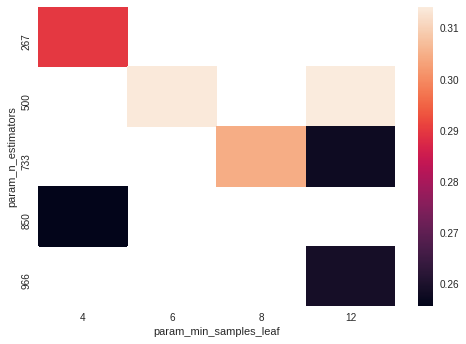

In [14]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_min_samples_leaf')
     
sns.heatmap(table)

In [15]:
predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[805  74   0  58   2   0   0  50   9   0  84  19]
 [157 163   0  28   1   0   0  42   1   2  21  14]
 [156  24   9   8   3   0   0  47   0   0  40   0]
 [241  63   0 124   4   0   0  70   4   3  55   6]
 [194   8   0  10  27   0   0  23   1   1  23   2]
 [102   7   0  29   1   0   1  29   0   0  13   3]
 [264   8   0  17   3   0  19  12   6   0  81   5]
 [177  55   0  12   2   0   0 199   6   2  22   9]
 [292  15   0   9   2   0   1  16  40   0  39  11]
 [105  28   0  39   1   0   0  31   1  23  34  16]
 [267  22   1  34   4   0   0  43   3   3 409   7]
 [106  19   1  10   0   0   0  40   1   1  17  27]]
              precision    recall  f1-score   support

           0       0.28      0.73      0.41      1101
           1       0.34      0.38      0.36       429
           2       0.82      0.03      0.06       287
           3       0.33      0.22      0.26       570
           4       0.54      0.09      0.16       289
           5       0.00      0.00      0.00       185
        

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
df2 = pd.DataFrame(model.cv_results_)
df2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,2.556888,0.037741,0.291622,0.000604,267,7,4,34,10,False,"{'n_estimators': 267, 'min_samples_split': 7, ...",0.293525,0.286331,0.289928,0.003597,4
1,5.495229,0.073240,0.773726,0.004531,733,10,12,10,10,False,"{'n_estimators': 733, 'min_samples_split': 10,...",0.259353,0.256295,0.257824,0.001529,6
2,6.026870,0.045137,0.920788,0.011086,850,5,4,10,671,True,"{'n_estimators': 850, 'min_samples_split': 5, ...",0.256835,0.254676,0.255755,0.001079,7
3,6.947119,0.031022,0.870113,0.001734,733,7,8,71,406,True,"{'n_estimators': 733, 'min_samples_split': 7, ...",0.307554,0.301799,0.304676,0.002878,3
4,4.921101,0.012852,0.611405,0.005253,500,5,6,95,935,True,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.318705,0.308993,0.313849,0.004856,2


In [17]:
enc_bootstrap = preprocessing.LabelEncoder().fit_transform(df2['param_bootstrap'])
df2 = df2.drop(['params', 'param_bootstrap'], axis=1)
df2['param_bootstrap'] = enc_bootstrap
df2['mean_test_score'] = df2['mean_test_score']*100
df2 = df2[['param_bootstrap', 'param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_leaf_nodes',
           'param_max_depth', 'mean_test_score']].astype(int)

In [18]:
df2['mean_test_score']

0    28
1    25
2    25
3    30
4    31
5    31
6    25
Name: mean_test_score, dtype: int64

## Custom Matplotlib

In [19]:
# From: https://stackoverflow.com/questions/23547347/parallel-coordinates-plot-for-continous-data-in-pandas
def parallel_coordinates2(frame, class_column, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None,
                     **kwds):

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)

    if cols is None:
        df = frame.drop(class_column, axis=1)
    else:
        df = frame[cols]

    used_legends = set([])

    ncols = len(df.columns)

    # determine values to use for xticks
    if use_columns is True:
        if not np.all(np.isreal(list(df.columns))):
            raise ValueError('Columns must be numeric to be used as xticks')
        x = df.columns
    elif xticks is not None:
        if not np.all(np.isreal(xticks)):
            raise ValueError('xticks specified must be numeric')
        elif len(xticks) != ncols:
            raise ValueError('Length of xticks must match number of columns')
        x = xticks
    else:
        x = range(ncols)

    fig = plt.figure(figsize=(18,7))
    ax = fig.add_subplot(111)

    Colorm = plt.get_cmap(colormap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        ax.plot(x, y, color=Colorm((kls - class_min)/(class_max-class_min)), 
                alpha=(kls - class_min)/(class_max-class_min), **kwds)

    for i in x:
        ax.axvline(i, linewidth=1, color='black')

    ax.set_xticks(x)
    ax.set_xticklabels(df.columns)
    ax.set_xlim(x[0], x[-1])
    ax.set_title("Parallel Coordinates Example", fontsize=20)
    ax.tick_params(axis='x', rotation=30)
    ax.tick_params(axis='both', labelsize=20)
    ax.grid(False)

    bounds = np.linspace(class_min,class_max,10)
    cax,_ = mpl.colorbar.make_axes(ax)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=Colorm, spacing='proportional', ticks=bounds, 
                                   boundaries=bounds, format='%.2f')

    return fig

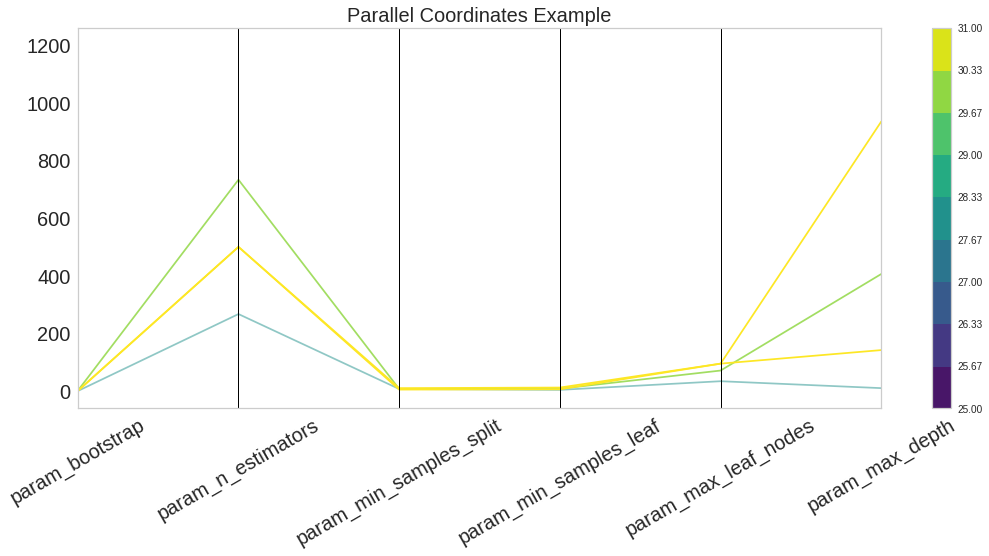

In [20]:
fig = parallel_coordinates2(df2, class_column='mean_test_score',  colormap="viridis")

## Plotly

In [21]:
!pip install chart-studio

     |████████████████████████████████| 64 kB 1.2 MB/s 


In [22]:
import chart_studio
chart_studio.tools.set_credentials_file(username='TODO', api_key='TODO')

In [23]:
import plotly.express as px
import chart_studio.plotly as py

fig = px.parallel_coordinates(df2, color="mean_test_score", 
                             labels=dict(zip(list(df2.columns), 
                                             list(['_'.join(i.split('_')[1:]) for i in df2.columns]))),
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=27)
#py.plot(fig, filename = 'Parallel Coordinates', auto_open=True)
fig.show()

In [24]:
fig = px.parallel_coordinates(df, color="Genre", 
                             labels=list(df.columns),
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=27)
fig.show()

## Data Wrapper

In [25]:
!pip install datawrapper

In [26]:
from datawrapper import Datawrapper
dw = Datawrapper(access_token = "TODO")

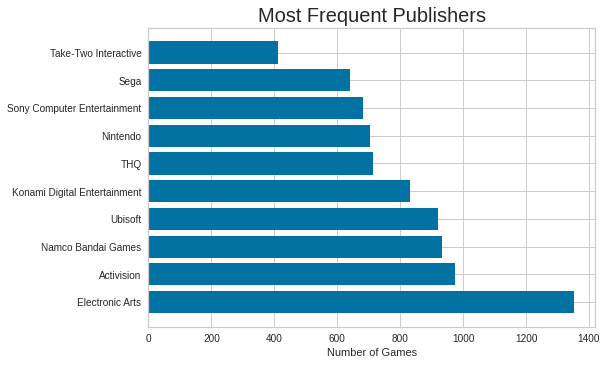

In [27]:
df3 = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
#df3.head()
plt.barh(df3['Publisher'].value_counts().index[:10], df3['Publisher'].value_counts().values[:10])
plt.title("Most Frequent Publishers")
plt.xlabel("Number of Games");

In [28]:
res = {'Publisher Name': df3['Publisher'].value_counts().index[:10], 'Occurrences': df3['Publisher'].value_counts().values[:10]}
res = pd.DataFrame(data=res)

In [29]:
# games_chart = dw.create_chart(title = "Most Frequent Game Publishers", chart_type = 'd3-bars', data = res)

In [30]:
# dw.update_description(
#     games_chart['id'],
#     source_name = 'Video Game Sales',
#     source_url = 'https://www.kaggle.com/gregorut/videogamesales',
#     byline = 'Pier Paolo Ippolito',
# )

In [31]:
from IPython.display import IFrame

# dw.publish_chart(games_chart['id'])

In [32]:
from IPython.display import HTML

HTML('<iframe title="Most Frequent Game Publishers" aria-label="Bar Chart" id="datawrapper-chart-YEUFF" src="https://datawrapper.dwcdn.net/YEUFF/1/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="undefined"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(a){if(void 0!==a.data["datawrapper-height"])for(var e in a.data["datawrapper-height"]){var t=document.getElementById("datawrapper-chart-"+e)||document.querySelector("iframe[src*='"+e+"']");t&&(t.style.height=a.data["datawrapper-height"][e]+"px")}}))}();</script>')

Alternatively, it could be possible to use [Weights & Biases Sweeps](https://www.wandb.com/articles/hyperparameter-tuning-as-easy-as-1-2-3)

## dtreeviz : Decision Tree Visualization 

In [33]:
!pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-0.8.2-py3-none-any.whl size=24501 sha256=72e11e8c05dd9092dcd5c79ec51c1e466829ea3615d67795e4670b13025d8a40
  Stored in directory: /root/.cache/pip/wheels/2f/a4/af/948fc126ebbf6b01b01fe02c311b326e35bb115a3c6d4bdc90
Successfully built dtreeviz
ERROR: mxnet 1.6.0 has requirement graphviz<0.9.0,>=0.8.1, but you'll have graphviz 0.14 which is incompatible.
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4


In [34]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
df.drop(df[(df.Genre == 'Racing') | (df.Genre == 'Shooter') | (df.Genre == 'Role-Playing') ].index, inplace=True)
labels = df['Genre']
imputer = CategoricalImputer()
df['Year'] = imputer.fit_transform(df['Year'].values)
df['Publisher'] = imputer.fit_transform(df['Publisher'].values)
df = df.drop(['Rank', 'Year'], axis=1)
df = df.apply(preprocessing.LabelEncoder().fit_transform)
enc_labels = df['Genre']
df = pd.get_dummies(df)
df.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,8310,25,7,330,342,260,186,132,523
1,7008,11,4,330,341,236,197,77,522
3,8312,25,7,330,339,259,182,130,521
5,7295,5,5,330,340,196,191,58,520
6,5039,4,4,330,334,255,196,128,519


In [35]:
X = df.drop(['Genre'], axis=1)
y = df['Genre']
scaler = StandardScaler().fit(X)
X2 = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

In [36]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
predictionforest = clf.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[720  89   0   0   0   0   0 294   0]
 [205 155   0   0   0   0   0  56   0]
 [200  29   0   0   0   0   0  70   0]
 [399  58   0   0   0   0   0 112   0]
 [220   3   0   0   0   0   0  54   0]
 [168   7   0   0   0   0   0  28   0]
 [209  21   0   0   0   0   0  60   0]
 [393  25   0   0   0   0   0 336   0]
 [162  24   0   0   0   0   0  45   0]]
              precision    recall  f1-score   support

           0       0.27      0.65      0.38      1103
           1       0.38      0.37      0.37       416
           2       0.00      0.00      0.00       299
           3       0.00      0.00      0.00       569
           4       0.00      0.00      0.00       277
           5       0.00      0.00      0.00       203
           6       0.00      0.00      0.00       290
           7       0.32      0.45      0.37       754
           8       0.00      0.00      0.00       231

    accuracy                           0.29      4142
   macro avg       0.11      0.16      0.13      414

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning:

Pass classes=[0 1 2 3 4 5 6 7 8], y=[7 2 3 ... 2 0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error



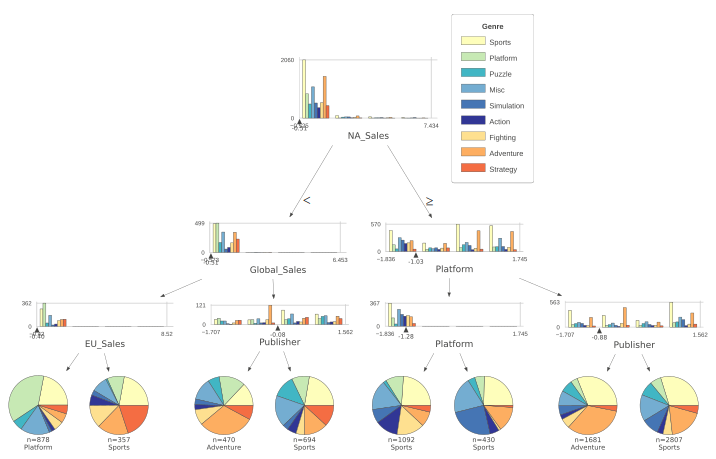

In [37]:
from dtreeviz.trees import *

viz = dtreeviz(clf,
               X_train,
               y_train.values,
               target_name='Genre',
               feature_names=list(X.columns),
               class_names=list(labels.unique()),
               histtype='bar', 
               orientation ='TD')
              
viz

In [38]:
#viz.svg()

In [39]:
!pip install ann_visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=45796f801e6210370e8ecc6129bf38085a797dd834752ead9ab0bcfc46cd045d
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [40]:
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz

model = Sequential()
model.add(Dense(units=4,activation='relu',
                  input_dim=7))
model.add(Dense(units=4,activation='sigmoid'))
model.add(Dense(units=2,activation='relu'))

ann_viz(model, view=True, filename="example", title="Example ANN")

Using TensorFlow backend.
